<a href="https://colab.research.google.com/github/sarjakpatel/AIRoyal/blob/master/AirQualityPredictionUsingPCA%26FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [15]:
data = pd.read_excel('/content/AirQualityUCI.xlsx')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [17]:
data=data[data['NMHC(GT)']!=-200]
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,2004-04-30,20:00:00,4.4,1449.25,501,19.494597,1282.25,254.0,625.00,133.0,2099.50,1568.50,19.075,61.075001,1.334500
1227,2004-04-30,21:00:00,3.1,1362.50,234,15.100351,1151.75,189.0,683.75,110.0,1951.25,1494.75,18.200,65.350002,1.352888
1228,2004-04-30,22:00:00,3.0,1371.25,212,14.594739,1135.75,174.0,689.00,102.0,1926.75,1471.25,18.075,66.100000,1.357869
1229,2004-04-30,23:00:00,3.1,1406.25,275,13.697100,1106.75,167.0,718.25,108.0,1871.50,1383.75,17.700,66.875000,1.342218


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=data.drop(['Date', 'Time','AH'], axis=1)

x=scaler.fit_transform(x)

y=data.AH
print(y)
x

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
1226    1.334500
1227    1.352888
1228    1.357869
1229    1.342218
1230    1.345960
Name: AH, Length: 914, dtype: float64


array([[0.9735704 , 0.69650631, 0.12098139, ..., 0.57357827, 0.92869565,
        0.87871834],
       [0.97068717, 0.66625739, 0.08883249, ..., 0.45817862, 0.9273913 ,
        0.87456969],
       [0.97164825, 0.7152584 , 0.06852792, ..., 0.49794802, 0.92130435,
        0.89672522],
       ...,
       [0.97549255, 0.70152919, 0.17343486, ..., 0.65321477, 0.94815217,
        0.93953571],
       [0.97597309, 0.71715593, 0.22673435, ..., 0.61901505, 0.94652174,
        0.94227205],
       [0.97789524, 0.72530416, 0.22673435, ..., 0.77731092, 0.94684783,
        0.94183071]])

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
x_new = pca.fit_transform(x)
x_new
pca.get_covariance()

array([[ 0.02423245,  0.00312963,  0.00488479,  0.00032177,  0.00460313,
         0.00395188, -0.00531081,  0.00267428,  0.00255156,  0.00360571,
        -0.00024871, -0.00180068],
       [ 0.00312963,  0.02262182,  0.01454324,  0.01873407,  0.02429403,
         0.01262998, -0.0016309 ,  0.00984223,  0.0215459 ,  0.02397641,
         0.01745634,  0.01523852],
       [ 0.00488479,  0.01454324,  0.02992137,  0.00461842,  0.02063509,
         0.01925776, -0.01719085,  0.0141076 ,  0.01511072,  0.02025937,
         0.00123339, -0.00189971],
       [ 0.00032177,  0.01873407,  0.00461842,  0.02311034,  0.01889752,
         0.00261145,  0.01068138,  0.00216486,  0.01865514,  0.0162942 ,
         0.02389592,  0.02190501],
       [ 0.00460313,  0.02429403,  0.02063509,  0.01889752,  0.02864237,
         0.01675065, -0.00675716,  0.01341738,  0.02398324,  0.02722144,
         0.01704715,  0.01314984],
       [ 0.00395188,  0.01262998,  0.01925776,  0.00261145,  0.01675065,
         0.02387561, -

In [20]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.25216345e-01, 2.87666987e-01, 7.68351321e-02, 5.99909881e-02,
       2.29468048e-02, 1.01385674e-02, 8.04210311e-03, 4.81930253e-03,
       2.31478671e-03, 1.08869335e-03, 8.73272261e-04, 6.70175697e-05])

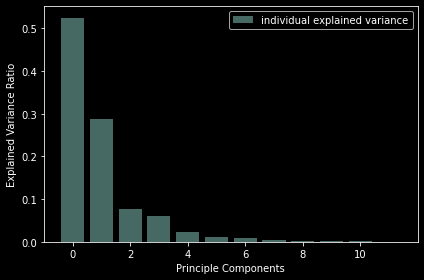

In [21]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))

  plt.bar(range(12), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [147]:
pca=PCA(n_components=2)
x_new = pca.fit_transform(x)

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)

In [149]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(300, input_shape=(2,),activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(Adam(lr=0.1),loss='mean_squared_error')

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 300)               900       
_________________________________________________________________
dense_85 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 101       
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.fit(x_train, y_train, epochs = 100,batch_size=10)

Epoch 1/100
74/74 [==============================] - 0s 2ms/step - loss: 173.9778
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 3.1779
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.2640
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 119.1129
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 52.4545
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 24.1222
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 2.0270
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 310.1942
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 10.5951
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1762
Epoch 11/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0782
Epoch 12/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1658
Epoch 13/100
74/74 [========

In [151]:
result = model.evaluate(x_test, y_test)
print(result)
accuracy = 1 - result
print("Accuracy : {}".format(accuracy))

6/6 [==============================] - 0s 1ms/step - loss: 0.0379
0.0378858782351017
Accuracy : 0.9621141217648983


12 Components :
Accuracy : 0.6891951858997345

8 Components :
Accuracy : 0.9664389118552208

6 Components :
Accuracy : 0.9673664309084415

4 Components :
Accuracy :  0.9690095409750938

3 Components :
Accuracy :  0.8724687248468399
             
2 Components :
Accuracy : 0.9621141217648983
